# An Introduction to Machine Learning
## Session 1b: Classification Basics and Logistic Regression

Welcome to Session 1b! We’ll delve deeper into machine learning by exploring classification models. Classification models help us predict categorical outcomes, like whether a passenger on the Titanic survived or not.

We’ll introduce Logistic Regression, one of the most straightforward classification models, and use it to make predictions based on features in the Titanic dataset. You’ll also learn about how to evaluate classification models using metrics like accuracy, precision, and recall. By the end of this session, you’ll have a solid foundation in training and evaluating a basic classification model.

### 1. Importing packages and pre-processing for classification data.

In [52]:
# Run this cell to import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [53]:
# Load the Titanic dataset and display the first few rows
titanic_data = pd.read_csv("../data/titanic_train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
# Fill missing values for 'Age' with median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [56]:
# Convert 'Sex' to numerical values and 'Embarked' with one-hot encoding
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

In [57]:
# Define features and target
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = titanic_data['Survived']

In [58]:
# EXERCISE: Split the dataset into training (80%) and testing (20%) sets.
# Use train_test_split function with test_size=0.2 and random_state=42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

### 2. Logistic regression classifier

In [59]:
# Initialise the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

In [60]:
# EXERCISE: Train the Logistic Regression model on the training data.
# Hint: Use .fit() method with X_train and y_train.

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [61]:
# EXERCISE: Predict the survival on the test data using the trained model.
# Hint: Use .predict() method with X_test.

y_pred = log_reg.predict(X_test)

In [62]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7980364656381487
Precision: 0.7929515418502202
Recall: 0.6498194945848376


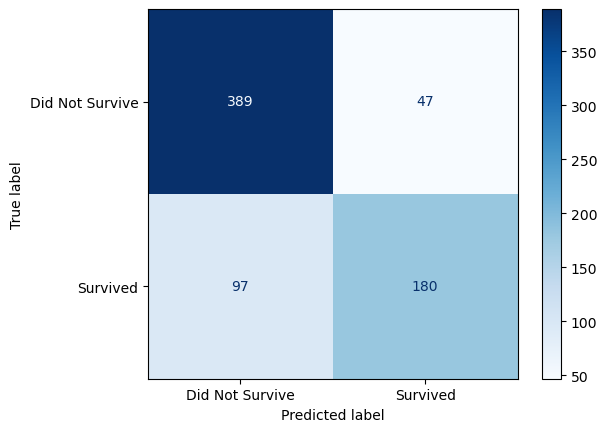

In [63]:
# EXERCISE: Plot the confusion matrix.
# Hint: Use ConfusionMatrixDisplay with confusion_matrix(y_test, y_pred).

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Survive', 'Survived']).plot(cmap='Blues')
plt.show()

### 3. Thinking about what we've seen

In this cell, write down:

1. Which metric (accuracy, precision, or recall) do you think is most important in predicting survival, and why?
2. What could you do to improve the model’s performance? Think of any additional features you might include or methods you might try.